In [51]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict, Annotated
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_openai import ChatOpenAI
from langgraph.checkpoint.memory import MemorySaver
from dotenv import load_dotenv

In [52]:
load_dotenv()


True

In [53]:
generator_llm = ChatOpenAI(model='gpt-4o-mini')
summarizer_llm = ChatOpenAI(model='gpt-4o')


In [63]:
class summarized(TypedDict):
    topic:str
    generated_text:str
    summarized_text:str

    words:int


In [64]:
def generated_text(state:summarized)->dict:
    topic = state['topic']
    words = state['words']
    prompt=f'Generate a detailed article about {topic} \n maximum {words} words.'
    ans=generator_llm.invoke(prompt).content
    return {'generated_text': ans}

In [69]:
def summarized_text(state:summarized)->dict:
    topic = state['topic']
    prompt=f'Summarize the following article about {topic}: {state["generated_text"]}'
    ans=summarizer_llm.invoke(prompt).content
    return {'summarized_text': ans}

In [70]:
graph = StateGraph(summarized)

graph.add_node('generated_text',generated_text)
graph.add_node('summarized_text',summarized_text)


graph.add_edge(START,'generated_text')
graph.add_edge('generated_text', 'summarized_text')
graph.add_edge('summarized_text', END)

workflow=graph.compile()


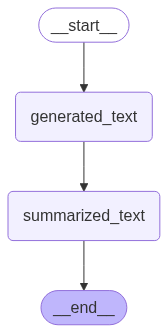

In [71]:
workflow

In [73]:
initial_state = {
    'topic': 'Artificial Intelligence',
    'words': 50
}
result =workflow.invoke(initial_state)

In [81]:
print(result['summarized_text'])

The article describes Artificial Intelligence (AI) as the replication of human intelligence in machines built to emulate human thought and behavior. It includes technologies like machine learning, natural language processing, and robotics. AI's primary goals are to address complex issues, boost efficiency, and enhance decision-making in various sectors, transforming everyday life and work practices.
